<a href="https://colab.research.google.com/github/barrosm/text_mining/blob/master/nltk_aula_20191109.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Toolkits and Preprocessing Exercises

## Introduction

**usaremos [revisar dados do Kaggle] (https://www.kaggle.com/snap/amazon-fine-food-reviews) para praticar o pré-processamento de dados de texto. O conjunto de dados contém análises de usuários para muitos produtos, mas hoje focaremos o produto no conjunto de dados que recebeu mais análises - um cookie de aveia.

O código a seguir ajudará você a carregar os dados. Se for a primeira vez que você usa o nltk, será necessário instalá-lo primeiro.

In [0]:
import nltk
#nltk.download()  <-- Run this if it's your first time using nltk to download all of the datasets and models

import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import os
workdir_path = '/content/drive/My Drive/exercicio_2_20191109'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls

cookie_reviews.csv


In [5]:
data = pd.read_csv('cookie_reviews.csv')
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


## Pergunta 1 ##

* Determine quantas reviews existem no total.
* Determine o percentual de 1, 2, 3, 4 e 5 estrelas.
* Determine a distribuição dos comprimentos de caracteres para as reviews ![alt text](https://)listando os valores e plotando um histograma.

In [9]:
# São 913
len(data)

913

In [10]:
# Esse cookie recebeu ótimas críticas no geral, com 68% dos usuários dando 5 estrelas
data.stars.value_counts(normalize=True)

5    0.683461
4    0.237678
3    0.061336
2    0.013143
1    0.004381
Name: stars, dtype: float64

In [11]:
# Isso nos diz que houve 10 reviews com 134 caracteres
data.reviews.map(len).value_counts().head()

134    10
157     9
137     8
107     8
132     8
Name: reviews, dtype: int64

In [0]:
# Importação seaborn para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

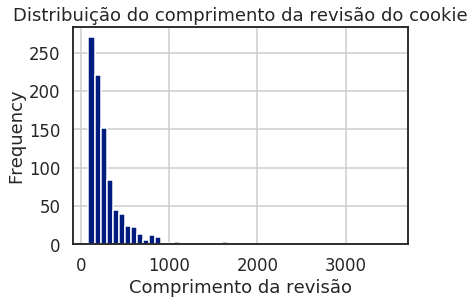

In [13]:
# Isso cria um histograma de todos os comprimentos da revisão
ax = data.reviews.map(len).hist(bins=50)
ax.set(xlabel='Comprimento da revisão', ylabel='Frequency', title='Distribuição do comprimento da revisão do cookie');

## Pergunta 2 ##

* Aplique as seguintes etapas de pré-processamento:

     1. Remova todas as palavras que contêm números
     2. Coloque todo o texto em minúsculas
     3. Remova puntuação 
     4. Tokenize as reviews em palavras
     
  Dica 1: use expressões regulares.
  
  Dica 2: a revisão de cookies na segunda linha possui números, letras maiúsculas e pontuação. Você pode usá-lo para testar suas expressões regulares.
     
     
* Encontre as palavras mais comuns.
* Determine a distribuição do comprimento da palavra em todo o corpus.

In [14]:
# Vamos dar uma olhada na aparência dos dados atualmente
data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...


In [15]:
# Esta revisão precisa ser muito limpa
#iloc indexação por posição 
data.iloc[1]

user_id                                       A1JAPP1CXRG57A
stars                                                      5
reviews    Quaker Soft Baked Oatmeal Cookies with raisins...
Name: 1, dtype: object

In [16]:
data.iloc[1,2]

'Quaker Soft Baked Oatmeal Cookies with raisins are a delicious treat, great for anytime of day.  For example:<br /><br />--at breakfast, I had one with a large banana and a cup of coffee, and felt I\'d had a relatively "healthy" start to the day.<br /><br />--the next day at lunch, following a tuna sandwich, I had one with a glass of milk, and was satisfied enough to not need a snack before dinner at 6:30.<br /><br />--the following night, after dinner, I had one with the remainder of my glass of wine. (Delicious!) And again, didn\'t feel the need to snack later in the evening.<br /><br />Each cookie is individually packaged, and their texture is soft and moist, with just the right amount of sweetness. Natural flavors used in the making are Cinnamon and All Spice.  These flavorings give the cookies a real old-fashioned, homemade taste.<br /><br />Nutritionally, the cookies have 170 calories each, 1.5g saturated fat, 150 mg sodium, and 12g sugar. They also have 2g of protein, and conta

In [17]:
# Essa expressão regular remove todas as palavras com números e também torna todas as palavras em minúsculas
import re

lower_alpha = lambda x: re.sub(r"""\w*\d\w*""", ' ', x.lower())
data['reviews'] = data.reviews.map(lower_alpha)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies! not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these. i was very pleased to giv...


In [18]:
# Essa expressão regular remove toda a pontuação
import string

punc_re = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
data['reviews'] = data.reviews.map(punc_re)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...


In [19]:
# Esta é a revisão após a limpeza
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example  br    br     at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day  br    br     the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at      br    br     the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening  br    br   each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste  br    br   nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fib

In [20]:
# Parece que há muitos "<br>" por aí. Vamos nos livrar deles.

remove_br = lambda x: re.sub(r""" br """, ' ', x.lower())
data['reviews'] = data.reviews.map(remove_br)

data.head()

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,i participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...


In [21]:
# as reviews estão começando a parecer muito boas!
data.iloc[1,2]

'quaker soft baked oatmeal cookies with raisins are a delicious treat  great for anytime of day   for example         at breakfast  i had one with a large banana and a cup of coffee  and felt i d had a relatively  healthy  start to the day         the next day at lunch  following a tuna sandwich  i had one with a glass of milk  and was satisfied enough to not need a snack before dinner at             the following night  after dinner  i had one with the remainder of my glass of wine   delicious   and again  didn t feel the need to snack later in the evening       each cookie is individually packaged  and their texture is soft and moist  with just the right amount of sweetness  natural flavors used in the making are cinnamon and all spice   these flavorings give the cookies a real old fashioned  homemade taste       nutritionally  the cookies have   calories each      saturated fat    mg sodium  and   sugar  they also have   of protein  and contain   of fiber       while the calorie cou

In [22]:
# Tokenize as reviews em palavras
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data['tokens'] = data.reviews.map(word_tokenize)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,user_id,stars,reviews,tokens
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased..."


In [23]:
# Isso cria uma lista enorme combinando todos os valores de tokens
word_list = sum(data.tokens.tolist(), [])

word_list[:10]

['i',
 'love',
 'these',
 'cookies',
 'not',
 'only',
 'are',
 'they',
 'healthy',
 'but']

In [0]:
# Estas são as etapas para encontrar as palavras mais comuns

from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts = Counter(word_list)



In [37]:
# Inverter a chave / valores no dicionário para classificarReverter a chave / valores no dicionário para classificar
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Classifique a lista por contagem
word_counts = sorted(word_counts, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts[:10]

[(2145, 'i'),
 (1755, 'and'),
 (1652, 'the'),
 (1310, 'a'),
 (1028, 'it'),
 (991, 'to'),
 (845, 'my'),
 (843, 'cookies'),
 (842, 'cookie'),
 (780, 'of')]

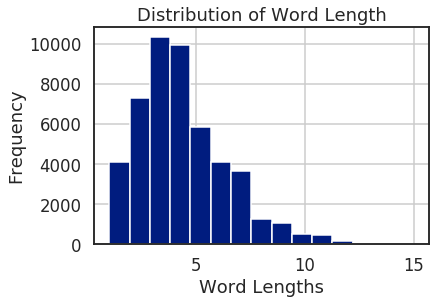

In [38]:
# A distribuição dos comprimentos das palavras
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

##Pergunta 3 ##

*Aplique as seguintes técnicas de pré-processamento:

     * Remover palavras-chave
     *  Execute partes da marcação de fala
     * Realize stemming
     * Opcional: Executar lematização

 Recomendação: Crie uma nova coluna no seu conjunto de dados para todas as técnicas de pré-processamento aplicadas, para poder ver a progressão do texto das revisões.

In [40]:
# Remova as stop words
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words = stopwords.words('english')

stop_lambda = lambda x: [y for y in x if y not in stop_words]
data['tokens_stop'] = data.tokens.apply(stop_lambda)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_id,stars,reviews,tokens,tokens_stop,tokens_pos,tokens_stem,tokens_lemma
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[love, cooki, healthi, tast, great, soft, defi...","[love, cooky, healthy, taste, great, soft, def..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[quaker, soft, bake, oatmeal, cooky, raisins, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[usually, huge, fan, oatmeal, cooky, literally..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[particip, product, review, includ, sampl, hre...","[participated, product, review, include, sampl..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[kid, love, pleas, give, kid, quick, go, healt...","[kid, love, pleased, give, kid, quick, go, hea..."


In [41]:
# partes de speech tagging
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
pos_lambda = lambda x: nltk.pos_tag(x)
data['tokens_pos'] = (data.tokens_stop.apply(pos_lambda))
data.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,user_id,stars,reviews,tokens,tokens_stop,tokens_pos,tokens_stem,tokens_lemma
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[love, cooki, healthi, tast, great, soft, defi...","[love, cooky, healthy, taste, great, soft, def..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[quaker, soft, bake, oatmeal, cooky, raisins, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[usually, huge, fan, oatmeal, cooky, literally..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[particip, product, review, includ, sampl, hre...","[participated, product, review, include, sampl..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[kid, love, pleas, give, kid, quick, go, healt...","[kid, love, pleased, give, kid, quick, go, hea..."


In [42]:
# Executar stemming, que remove terminações de palavras alternativas sem o conhecimento do contexto
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')
stem_lambda = lambda x: [stemmer.stem(y) for y in x]

data['tokens_stem'] = data.tokens_stop.apply(stem_lambda)
data.head()

,user_id,stars,reviews,tokens,tokens_stop,tokens_pos,tokens_stem,tokens_lemma
0,A368Z46FIKHSEZ,5,i love these cookies not only are they healt...,"[i, love, these, cookies, not, only, are, they...","[love, cookies, healthy, taste, great, soft, d...","[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[love, cooki, healthi, tast, great, soft, defi...","[love, cooky, healthy, taste, great, soft, def..."
1,A1JAPP1CXRG57A,5,quaker soft baked oatmeal cookies with raisins...,"[quaker, soft, baked, oatmeal, cookies, with, ...","[quaker, soft, baked, oatmeal, cookies, raisin...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[quaker, soft, bake, oatmeal, cooky, raisins, ..."
2,A2Z9JNXPIEL2B9,5,i am usually not a huge fan of oatmeal cookies...,"[i, am, usually, not, a, huge, fan, of, oatmea...","[usually, huge, fan, oatmeal, cookies, literal...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[usually, huge, fan, oatmeal, cooky, literally..."
3,A31CYJQO3FL586,5,i participated in a product review that includ...,"[i, participated, in, a, product, review, that...","[participated, product, review, included, samp...","[(participated, JJ), (product, NN), (review, N...","[particip, product, review, includ, sampl, hre...","[participated, product, review, include, sampl..."
4,A2KXQ2EKFF3K2G,5,my kids loved these i was very pleased to giv...,"[my, kids, loved, these, i, was, very, pleased...","[kids, loved, pleased, give, kids, quick, go, ...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi...","[kid, love, pleas, give, kid, quick, go, healt...","[kid, love, pleased, give, kid, quick, go, hea..."


In [43]:
# Realizar lematização, que é uma forma mais inteligente de derivação e leva em consideração o contexto
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

# Convert the naming scheme to one that is recognized by WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()
lemmatizer_fun = lambda x: lemmatizer.lemmatize(*x)
data['tokens_lemma'] = data.tokens_pos\
                        .apply(lambda x: [(y[0], get_wordnet_pos(y[1])) for y in x])\
                        .apply(lambda x: [lemmatizer_fun(y) for y in x])

# Exibir as colunas transpostas
data.head().T

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_c

,0,1,2,3,4
user_id,A368Z46FIKHSEZ,A1JAPP1CXRG57A,A2Z9JNXPIEL2B9,A31CYJQO3FL586,A2KXQ2EKFF3K2G
stars,5,5,5,5,5
reviews,i love these cookies not only are they healt...,quaker soft baked oatmeal cookies with raisins...,i am usually not a huge fan of oatmeal cookies...,i participated in a product review that includ...,my kids loved these i was very pleased to giv...
tokens,"[i, love, these, cookies, not, only, are, they...","[quaker, soft, baked, oatmeal, cookies, with, ...","[i, am, usually, not, a, huge, fan, of, oatmea...","[i, participated, in, a, product, review, that...","[my, kids, loved, these, i, was, very, pleased..."
tokens_stop,"[love, cookies, healthy, taste, great, soft, d...","[quaker, soft, baked, oatmeal, cookies, raisin...","[usually, huge, fan, oatmeal, cookies, literal...","[participated, product, review, included, samp...","[kids, loved, pleased, give, kids, quick, go, ..."
tokens_pos,"[(love, VB), (cookies, NNS), (healthy, JJ), (t...","[(quaker, NN), (soft, JJ), (baked, VBD), (oatm...","[(usually, RB), (huge, JJ), (fan, NN), (oatmea...","[(participated, JJ), (product, NN), (review, N...","[(kids, NNS), (loved, VBD), (pleased, JJ), (gi..."
tokens_stem,"[love, cooki, healthi, tast, great, soft, defi...","[quaker, soft, bake, oatmeal, cooki, raisin, d...","[usual, huge, fan, oatmeal, cooki, liter, melt...","[particip, product, review, includ, sampl, hre...","[kid, love, pleas, give, kid, quick, go, healt..."
tokens_lemma,"[love, cooky, healthy, taste, great, soft, def...","[quaker, soft, bake, oatmeal, cooky, raisins, ...","[usually, huge, fan, oatmeal, cooky, literally...","[participated, product, review, include, sampl...","[kid, love, pleased, give, kid, quick, go, hea..."


## Question 4 ##

* Depois de seguir essas etapas de pré-processamento, quais são as palavras mais comuns agora? Eles fazem mais sentido?

In [44]:
# Vamos encontrar as palavras mais comuns depois de limpar os dados

# Isso cria uma lista enorme combinando todos os valores de tokens
word_list_clean = sum(data.tokens_stem.tolist(), [])

word_list_clean[:10]


['love',
 'cooki',
 'healthi',
 'tast',
 'great',
 'soft',
 'definit',
 'add',
 'groceri',
 'list']

In [45]:
from collections import Counter

# Converte a lista em um dicionário com contagem de valores
word_counts_clean = Counter(word_list_clean)
a = word_counts_clean

# Inverta a chave / valores no dicionário para classificar
word_counts_clean = list(zip(word_counts_clean.values(), word_counts_clean.keys()))

# Classifique a lista por contagem
word_counts_clean = sorted(word_counts_clean, reverse=True)

# Imprime as 10 palavras mais comuns
word_counts_clean[:10]

[(1686, 'cooki'),
 (713, 'soft'),
 (559, 'love'),
 (482, 'oatmeal'),
 (416, 'tast'),
 (378, 'raisin'),
 (366, 'like'),
 (366, 'good'),
 (347, 'quaker'),
 (302, 'tri')]



Essas novas 10 principais palavras fazem muito mais sentido e nos dão uma boa idéia do significado do corpus. Só de olhar para estas 10 principais palavras, você pode dizer aos acordos de corpus com deliciosos biscoitos de aveia!

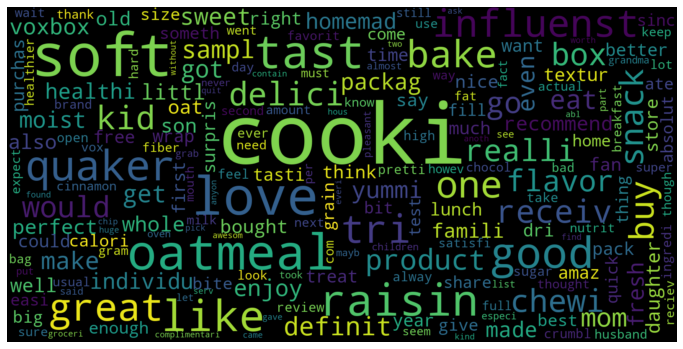

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = word_list_clean
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).fit_words(a)
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [47]:
import numpy as np
from PIL import Image
cookie = np.array(Image.open("cookie.jpg"))
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, mask=cookie).fit_words(a)


FileNotFoundError: ignored